# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer

# Data

In [2]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
news_data= pd.read_csv('drive/MyDrive/data.csv.zip')

In [4]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [5]:
# get titles and  news body
df = news_data[['title','article']]
df.head()

,title,article
0,superstar chef yannick alléno brings refined f...,"pavyllon london, at four seasons hotel london ..."
1,nice claim top spot in ligue 1 with late win a...,nice moved into provisional first place in the...
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe..."
3,image: rusty red waters in madagascar,iron-rich sediment colors the red-orange water...
4,everything leaving max (formerly hbo max) in n...,"everything ends. no, i’m not having an existen..."


## world cloud for title and article body

# Preprocessing

In [6]:

nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:

#function to clean the texts
def clean_text(text):
    # delete dnltk.download('punkt') special characters
    text = re.sub(r"[^\w\s]", "", text)

    # text to lower case
    text = text.lower()

    # Tokenisation
    tokens = word_tokenize(text)

    # delete empty words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # join tokens
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [8]:

# clean titles and bodies
df['processed_title'] = df['title'].apply(clean_text)
df['processed_body'] = df['article'].apply(clean_text)

df.head()

<ipython-input-8-368f85238361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_title'] = df['title'].apply(clean_text)
<ipython-input-8-368f85238361>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_body'] = df['article'].apply(clean_text)


,title,article,processed_title,processed_body
0,superstar chef yannick alléno brings refined f...,"pavyllon london, at four seasons hotel london ...",superstar chef yannick alléno brings refined f...,pavyllon london four seasons hotel london park...
1,nice claim top spot in ligue 1 with late win a...,nice moved into provisional first place in the...,nice claim top spot ligue 1 late win clermont,nice moved provisional first place ligue 1 sta...
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe...",amphibians worlds vulnerable species threats i...,worlds frogs salamanders newts amphibians rema...
3,image: rusty red waters in madagascar,iron-rich sediment colors the red-orange water...,image rusty red waters madagascar,ironrich sediment colors redorange waters bets...
4,everything leaving max (formerly hbo max) in n...,"everything ends. no, i’m not having an existen...",everything leaving max formerly hbo max novemb...,everything ends im existential crisis im looki...


# Word Embeddings using tf-idf and cosine similarity computation

In [9]:
def tf_idf_similarty(title, body):
  # cobine title and body in a list
  title_body=[title, body]

  # Create an instance of  TfidfVectorizer
  vectorizer = TfidfVectorizer()
  # get tf-idf scores
  tfidf_matrix = vectorizer.fit_transform(title_body)
  # title and body similarity score
  similarity_scores = cosine_similarity( tfidf_matrix , tfidf_matrix)
  return similarity_scores[0,1]



In [13]:
similarities=[]
for title, body in zip(df['processed_title'],df['processed_body']):
  similarities.append(tf_idf_similarty(title, body))


In [14]:
df['title_body_similarity_score']=similarities

<ipython-input-14-0aa089a78021>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_body_similarity_score']=similarities


In [15]:
df.head()

,title,article,processed_title,processed_body,title_body_similarity_score
0,superstar chef yannick alléno brings refined f...,"pavyllon london, at four seasons hotel london ...",superstar chef yannick alléno brings refined f...,pavyllon london four seasons hotel london park...,0.392167
1,nice claim top spot in ligue 1 with late win a...,nice moved into provisional first place in the...,nice claim top spot ligue 1 late win clermont,nice moved provisional first place ligue 1 sta...,0.185012
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe...",amphibians worlds vulnerable species threats i...,worlds frogs salamanders newts amphibians rema...,0.161449
3,image: rusty red waters in madagascar,iron-rich sediment colors the red-orange water...,image rusty red waters madagascar,ironrich sediment colors redorange waters bets...,0.280109
4,everything leaving max (formerly hbo max) in n...,"everything ends. no, i’m not having an existen...",everything leaving max formerly hbo max novemb...,everything ends im existential crisis im looki...,0.161061


In [16]:
import seaborn as sns

In [17]:
df['title_body_similarity_score'].describe()

count    58356.000000
mean         0.237513
std          0.105091
min          0.000000
25%          0.162379
50%          0.230131
75%          0.302284
max          1.000000
Name: title_body_similarity_score, dtype: float64

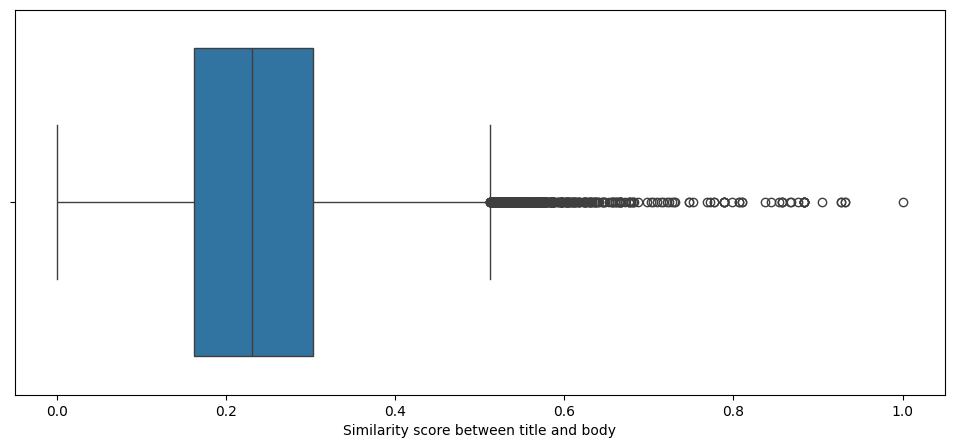

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='title_body_similarity_score')
plt.xlabel('Similarity score between title and body')
plt.show()

# Articles with similarity greater or equal 0.5

In [19]:
len(df[df['title_body_similarity_score']>=0.5])/df.shape[0]*100

1.369182260607307

In [20]:
len(df[df['title_body_similarity_score']>=0.5])

799

Only 799 (1.37%) articles have similaty between their title and body greater or equal 0.5.

# Topic modeling

## Additional libraries

In [21]:

import warnings
import spacy
from sklearn.datasets import fetch_20newsgroups
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [22]:
data=df['processed_title']

# Load Spacy

In [23]:
nlp = spacy.load("en_core_web_sm")

In [24]:
stopwords = list(STOP_WORDS)

## lemmatization

In [25]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuation ]
    mytokens = [ word for word in mytokens if len(word) > 3]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [26]:
# Creating a list of documents
list_of_docs = data.tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [spacy_tokenizer(doc).split() for doc in list_of_docs]

# Create Corpus using Bag of words

In [27]:
words = corpora.Dictionary(doc_clean)
corpus = [words.doc2bow(doc) for doc in doc_clean]

# LDA Modeling

In [28]:
lda_model = LdaModel(corpus=corpus, id2word=words, num_topics=4, random_state=2, update_every=1,\
                                 passes=10, alpha='auto')

In [41]:
# lda_model.save('models/model.model')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualization

In [30]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.2 MB/s eta 0:00:00


In [31]:
import pyLDAvis
import pyLDAvis.gensim

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, words, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.339037  0.094978       1        1  32.679786
0      0.118953  0.317164       2        1  28.273694
2      0.308421 -0.106222       3        1  21.131278
1     -0.088337 -0.305919       4        1  17.915243, topic_info=          Term         Freq        Total Category  logprob  loglift
302      share  4841.000000  4841.000000  Default  30.0000  30.0000
109     market  4715.000000  4715.000000  Default  29.0000  29.0000
2390     stock  4055.000000  4055.000000  Default  28.0000  28.0000
1025     price  1542.000000  1542.000000  Default  27.0000  27.0000
1221     group  2274.000000  2274.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
576       hold   391.569406   797.941011   Topic4  -5.2980   1.0076
95        list   227.020964   333.680508   Topic4  -5.8431   1.3344
366       plan   257.619730   602.029300   Topic4  -5.7167   0.8707
28    november   251.541913   598.748128   Topic4  -5.7406   0.8523
26        2023   210.055103  1628.912616   Topic4  -5.9208  -0.3288

[175 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
26        1  0.638463     2023
26        3  0.232057     2023
26        4  0.128920     2023
244       3  0.998332     2024
2386      1  0.999540  acquire
...     ...       ...      ...
229       1  0.999370   update
55        3  0.997816    watch
21        2  0.003249    world
21        4  0.996331    world
395       3  0.999312     year

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

# categorise the title/content into a known set of topic categories

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


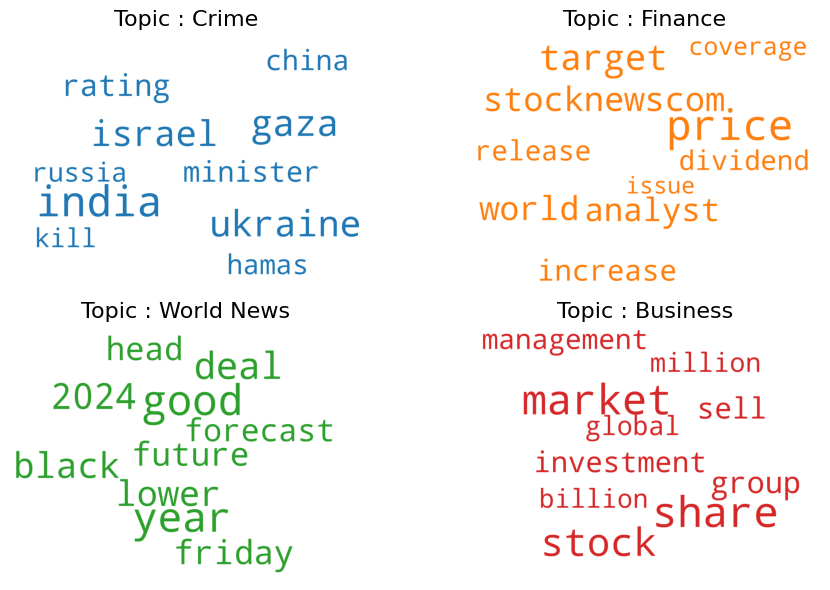

In [33]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,6), sharex=True, sharey=True)
topic_labels = ["Crime","Finance", "World News","Business"]

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic : ' + str(topic_labels[i]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=1, y=1)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

In [34]:

def assign_label_to_title(doc):
    # Map topics to labels
    topic_labels = {
        0: "Crime",
        1: "Finance",
        2: "World News",
        3: "Business"

    }

    # Get the topic distribution for the document
    doc_topics = lda_model.get_document_topics(doc)

    # Sort the topics by their probability
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)

    # Get the dominant topic
    dominant_topic, _ = sorted_topics[0]

    # Assign a label based on the dominant topic
    label = topic_labels.get(dominant_topic, "Other")

    return label



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
news_data['Title_topic']= pd.Series(corpus).apply(assign_label_to_title)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




# Which websites reported the most diverse topics?

In [36]:
news_data.groupby('source_name')['Title_topic'].value_counts().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source_name                  Title_topic
ETF Daily News               Business       12396
GlobeNewswire                Business        3600
The Times of India           Crime           3326
ETF Daily News               Finance         2907
Globalsecurity.org           Crime           2776
                                            ...  
Euronews                     Finance           17
Wired                        Business          14
The Verge                    Business          12
AllAfrica - Top Africa News  Finance            2
                             World News         1
Name: count, Length: 115, dtype: int64

ETF Daily News reported the most diverse topic

# Analyse the topic trends. For example, plot a 2D scatter plot such that x-axis is date, y-axis is the topics, and the color represents the count of the topic in that particular date. What  are the observed trends?


In [37]:
news_data["published_at"] =news_data["published_at"].str.split('.', expand=True)[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
news_data["published_at"] =pd.to_datetime(news_data["published_at"], format="%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# extract date from date time
news_data["published_date"] =news_data["published_at"].dt.date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


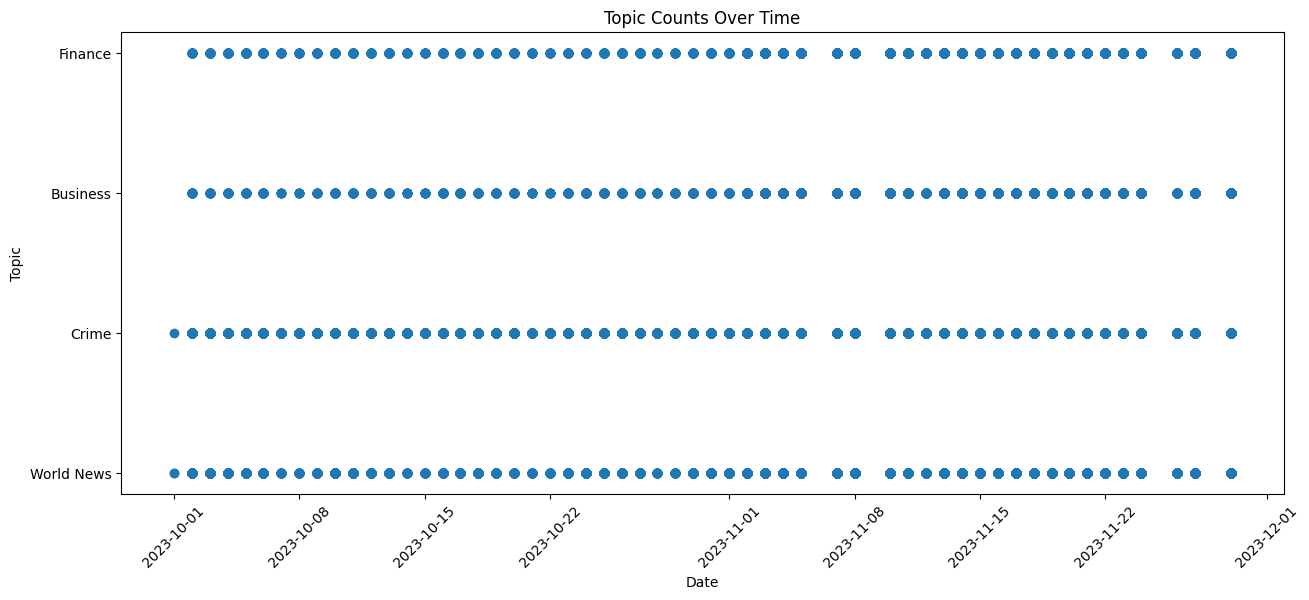

In [40]:
plt.figure(figsize=(15, 6))
plt.scatter(news_data['published_date'], news_data['Title_topic'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Topic')
plt.title('Topic Counts Over Time')


# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

# Model the events that the news articles are written about (this is the most challenging part of this project).

# How many events are covered in the data?


# Analyse which news sites report events the earliest?


# Which events have the highest reporting?


# What is the correlation between news sites reporting events?
